In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from numpy.linalg import pinv

In [21]:
# Load data from .dat files
time = np.loadtxt("C:/Users/Nishith/Desktop/delay_60_40.dat")  # 50 time points
wavelengths = np.loadtxt("C:/Users/Nishith/Desktop/wl_60_40.dat")  # 100 wavelengths
EAS = np.loadtxt("C:/Users/Nishith/Desktop/TES_60_40.dat")  # EAS data, shape should be (50, 100)
SAS = np.loadtxt("C:/Users/Nishith/Desktop/SES_60_40.dat")  # Concentration profiles, shape should be (50, 3)

In [23]:
#concentrations

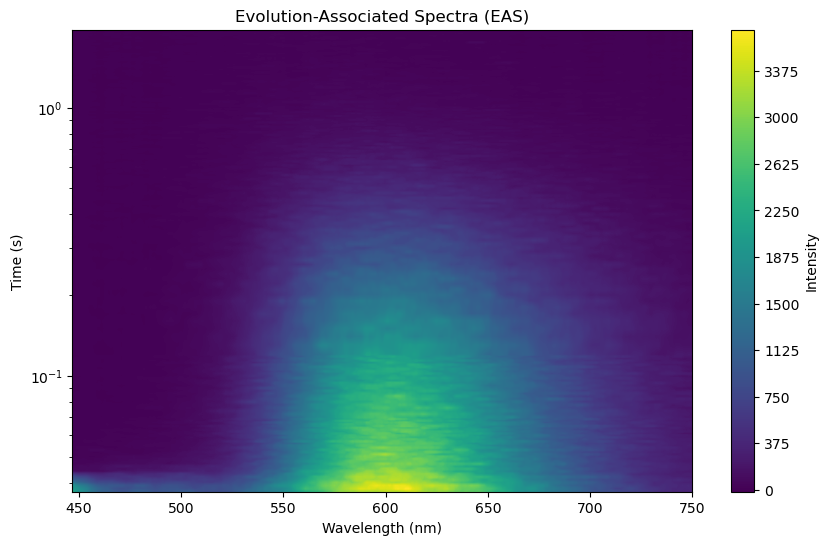

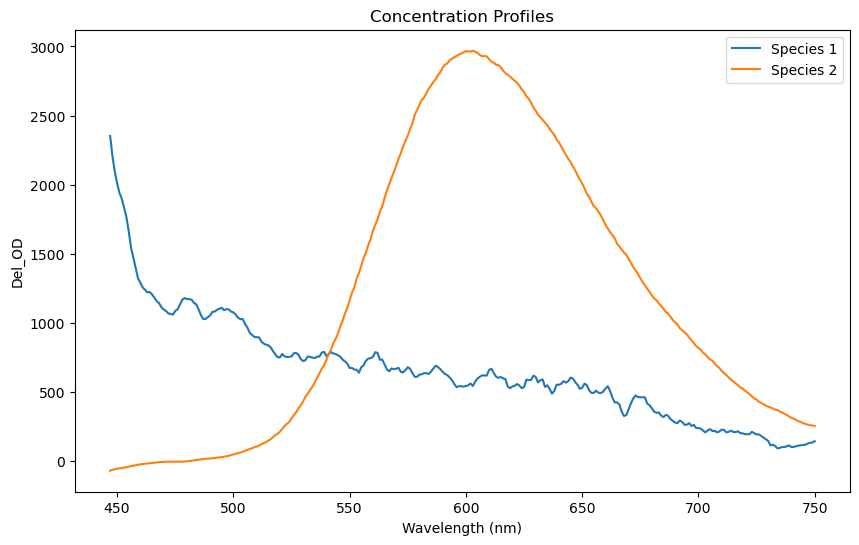

In [25]:
# Plot the EAS data
plt.figure(figsize=(10, 6))
plt.contourf(wavelengths, time, EAS, 336, cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Time (s)')
plt.title('Evolution-Associated Spectra (EAS)')
plt.yscale('log')
plt.show()

# Plot the concentration profiles
plt.figure(figsize=(10, 6))
for i in range(SAS.shape[1]):
    plt.plot(wavelengths, SAS[:, i], label=f'Species {i+1}')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Del_OD')
plt.title('Concentration Profiles')
plt.legend()
plt.show()


In [27]:
# Assuming `SAS`, `EAS`, `wavelengths`, and `time` are already defined
# For demonstration purposes, let's define `SAS`, `EAS`, and `time` with dummy values
# Compute the pseudoinverse of SAS
SAS_pinv = pinv(SAS)
SAS_t = SAS_pinv.transpose()
# Calculate the concentration matrix
calculated_concentrations = np.dot(EAS, SAS_t)

# For visualization
species_labels = ['Species 1', 'Species 2']

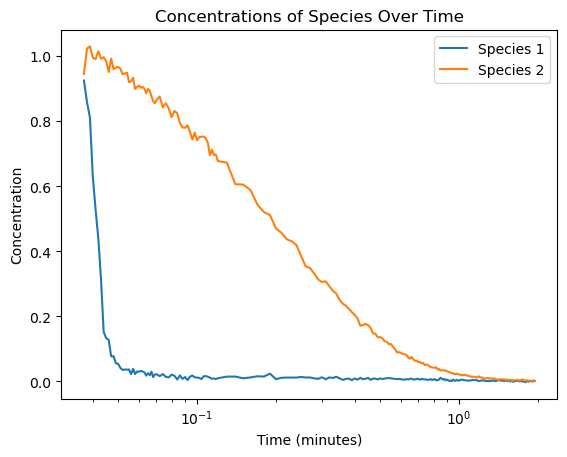

In [29]:
plt.figure()
for i in range(calculated_concentrations.shape[1]):
    plt.plot(time, calculated_concentrations[:, i], label=species_labels[i])
plt.xlabel('Time (minutes)')
plt.ylabel('Concentration')
plt.xscale('log')
plt.legend()
plt.title('Concentrations of Species Over Time')
plt.show()

# Output the calculated concentrations for verification
#print("Calculated Concentrations:\n", calculated_concentrations)

In [31]:
# Combine time and concentration data
data_to_save = np.column_stack((time, calculated_concentrations))

# Save the data to a .dat file
header = 'Time   Species 1   Species 2 '
np.savetxt('C:/Users/Nishith/Desktop/conc_prof_60_40.dat', data_to_save, delimiter='\t', header=header, comments='')